In [3]:
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.concat([pd.read_csv(file) for file in sorted(glob("./results/cifar10*.csv"))])
data.head()

,epoch,rank0,rank1,rank2,rank3,acc,loss,val_acc,val_loss,low_rank_0_eff_rank,low_rank_1_eff_rank,low_rank_2_eff_rank,low_rank_3_eff_rank
0,0,20,20,120,10,0.21290,2.079762,0.2558,1.986130,3.482179,3.311414,4.453778,2.058752
1,1,20,20,120,10,0.21332,2.073790,0.2403,1.968319,2.452301,2.732476,2.517608,2.092899
2,2,20,20,120,10,0.26286,1.963326,0.2393,2.002390,2.966595,3.140668,2.070014,2.067904
3,3,20,20,120,10,0.29394,1.906024,0.3312,1.834879,2.438617,2.695274,1.687570,2.042355
4,4,20,20,120,10,0.29038,1.913146,0.3247,1.847087,2.391496,2.641636,1.147921,2.017954


In [5]:

print(data["rank0"].unique())
print(data["rank1"].unique())
print(data["rank2"].unique())
print(data["rank3"].unique())

[20 60 80]
[20 30 40 60 80]
[120 140 200  20  30  40  60  80]
[10  5]


In [14]:
def plot_eff_rank(df, rank_num):
    data = df[[f"rank{rank_num}", "epoch", f"low_rank_{rank_num}_eff_rank", "val_acc"]]
    data = data.groupby(f"rank{rank_num}")

    def calc_eff_rank_change(x):
        start = x.loc[x["epoch"] == 0, f"low_rank_{rank_num}_eff_rank"].iloc[0]
        end = x.loc[x["epoch"] == 1, f"low_rank_{rank_num}_eff_rank"].iloc[0]
        return end - start

    eff_ranks = data.apply(calc_eff_rank_change)

    def calc_acc(x):
        return x["val_acc"].max()

    acc = data.apply(calc_acc)

    fig, ax = plt.subplots()
    ax.plot(eff_ranks.index, eff_ranks, color="blue")
    ax.set_ylabel("eff rank")
    ax2 = ax.twinx()
    ax2.plot(acc.index, acc, color="red")
    ax2.set_ylabel("val acc")

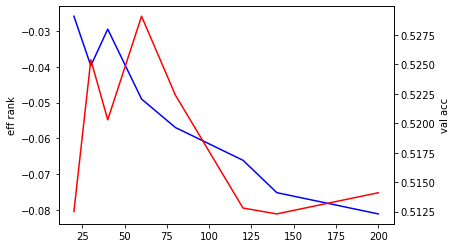

In [27]:
plot_eff_rank(
    data[
        (data["rank0"] == 80) &
        (data["rank1"] == 60) &
        (data["rank3"] == 10)
        ],
    2
)
plt.show()